In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import PIL
import matplotlib.pyplot as plt
import json
from IPython.display import Image as disp_image 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data_dir = '/content/drive/My Drive/DR_Messidor_Dataset'
img_height = 256
img_width = 256
batch_size = 32
channels = 3

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

In [ ]:
import tensorflow as tf
model = tf.keras.applications.ResNet50(weights = "imagenet", include_top=False, 
input_shape = (256, 256, 3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers[:-5]:
    layer.trainable = False

top_model = Sequential()
top_model.add(model)
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

print(model.summary())
print(top_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
top_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6),
                  metrics=METRICS)

history = top_model.fit(
          train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=18,
          validation_data=validation_generator,
          validation_steps=validation_generator.n // batch_size)

Epoch 1/18
 56/180 [========>.....................] - ETA: 1:36 - loss: 0.1048 - accuracy: 0.9710 - precision: 0.9731 - recall: 0.9731 - auc: 0.9912

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


180/180 [==============================] - 186s 985ms/step - loss: 0.0851 - accuracy: 0.9816 - precision: 0.9832 - recall: 0.9819 - auc: 0.9933 - val_loss: 0.0648 - val_accuracy: 0.9931 - val_precision: 0.9909 - val_recall: 0.9961 - val_auc: 0.9971
Epoch 2/18
180/180 [==============================] - 174s 967ms/step - loss: 0.0440 - accuracy: 0.9908 - precision: 0.9915 - recall: 0.9911 - auc: 0.9974 - val_loss: 0.0411 - val_accuracy: 0.9951 - val_precision: 0.9961 - val_recall: 0.9947 - val_auc: 0.9986
Epoch 3/18
180/180 [==============================] - 175s 973ms/step - loss: 0.0435 - accuracy: 0.9939 - precision: 0.9944 - recall: 0.9941 - auc: 0.9965 - val_loss: 0.0778 - val_accuracy: 0.9931 - val_precision: 0.9883 - val_recall: 0.9987 - val_auc: 0.9963
Epoch 4/18
180/180 [==============================] - 174s 965ms/step - loss: 0.0250 - accuracy: 0.9951 - precision: 0.9957 - recall: 0.9951 - auc: 0.9984 - val_loss: 0.0577 - val_accuracy: 0.9965 - val_precision: 0.9961 - val_reca

In [ ]:
print('\nEpoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy')
Epochs = 18
for i in range(Epochs):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['loss'][i], history.history['accuracy'][i], history.history['val_loss'][i], history.history['val_accuracy'][i]))


Epoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy
       1   0.085062 	   0.981588 	   0.064786 	   0.993056
       2   0.044021 	   0.990794 	   0.041082 	   0.995139
       3   0.043521 	   0.993920 	   0.077822 	   0.993056
       4   0.024997 	   0.995136 	   0.057700 	   0.996528
       5   0.009582 	   0.998610 	   0.093058 	   0.994444
       6   0.014648 	   0.998089 	   0.065412 	   0.995139
       7   0.010602 	   0.998784 	   0.063949 	   0.995833
       8   0.008565 	   0.998089 	   0.082720 	   0.995139
       9   0.011768 	   0.998089 	   0.064815 	   0.996528
      10   0.012599 	   0.997916 	   0.107431 	   0.993056
      11   0.008351 	   0.998958 	   0.082237 	   0.995139
      12   0.003772 	   0.999132 	   0.068433 	   0.994444
      13   0.007026 	   0.999305 	   0.058494 	   0.995139
      14   0.004015 	   0.998784 	   0.089072 	   0.996528
      15   0.001744 	   0.999653 	   0.084488 	   0.997222
      16   0.001191 	   0.999479 	   0.07916

In [ ]:
score = top_model.evaluate(validation_generator)
f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print("\n","Loss: ", score[0],"\n", "Accuracy: ", score[1],"\n", "Precision: ",score[2], "\n","Recall: ",score[3],"\n","F1-Score: ",f1_score,"\n","AUC: ",score[4])

46/46 [==============================] - 33s 719ms/step - loss: 0.1180 - accuracy: 0.9945 - precision: 0.9948 - recall: 0.9948 - auc: 0.9965

 Loss:  0.11796625703573227 
 Accuracy:  0.9944674968719482 
 Precision:  0.9947712421417236 
 Recall:  0.9947712421417236 
 F1-Score:  0.9947712421417236 
 AUC:  0.9964748024940491


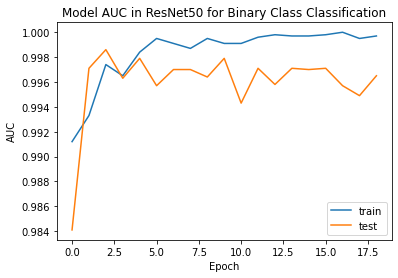

In [ ]:
import matplotlib.pyplot as plt
auc = [0.9912,0.9933,0.9974,0.9965,0.9984,0.9995,0.9991,0.9987,0.9995,0.9991,0.9991,0.9996,0.9998,0.9997,0.9997, 0.9998,1.000,0.9995,0.9997]
val_auc = [0.9841,0.9971,0.9986,0.9963,0.9979,0.9957,0.9970,0.9970,0.9964,0.9979,0.9943,0.9971,0.9958,0.9971,0.9970,0.9971,0.9957,0.9949,0.9965  ]
plt.title('Model AUC in ResNet50 for Binary Class Classification')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.plot(auc, label='train')
plt.plot(val_auc, label='test')
plt.legend()
plt.show()


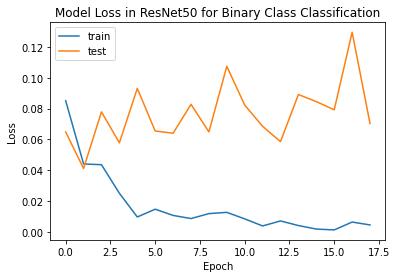

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Model Loss in ResNet50 for Binary Class Classification')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/LossNASNetMobile.png')
pyplot.legend()
pyplot.show()

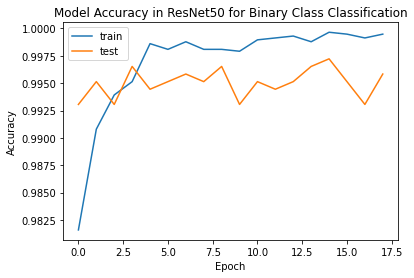

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Model Accuracy in ResNet50 for Binary Class Classification')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/AccuracyNASNetMobile.png')
pyplot.legend()
pyplot.show()